<a href="https://colab.research.google.com/github/Avinash-ml07/machine_learning_algorithms_from_scratch/blob/main/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [2]:
torch.manual_seed(42)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 432kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.95MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.15MB/s]


In [4]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model = DigitClassifier()
print(model)

DigitClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

[1,   200] loss: 0.748
[1,   400] loss: 0.353
[1,   600] loss: 0.300
[1,   800] loss: 0.282
[2,   200] loss: 0.222
[2,   400] loss: 0.201
[2,   600] loss: 0.175
[2,   800] loss: 0.165
[3,   200] loss: 0.141
[3,   400] loss: 0.151
[3,   600] loss: 0.129
[3,   800] loss: 0.135
[4,   200] loss: 0.114
[4,   400] loss: 0.108
[4,   600] loss: 0.106
[4,   800] loss: 0.111
[5,   200] loss: 0.098
[5,   400] loss: 0.094
[5,   600] loss: 0.095
[5,   800] loss: 0.093


In [6]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test images: {accuracy:.2f}%')

Accuracy on test images: 96.50%


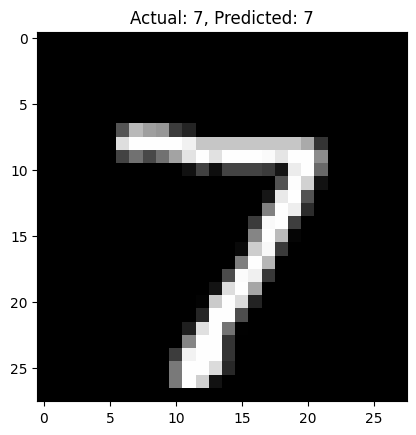

Actual label: 7
Predicted label: 7
Raw output scores: [[ -6.190345   -3.1433117   1.2048998   2.0126164 -10.566123   -5.8291183
  -16.44911     9.275152   -1.54367    -3.085895 ]]


In [7]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
img = images[0].unsqueeze(0)

with torch.no_grad():
    output = model(img)
    _, predicted = torch.max(output, 1)

img = img.squeeze().numpy()
plt.imshow(img, cmap='gray')
plt.title(f'Actual: {labels[0].item()}, Predicted: {predicted.item()}')
plt.show()

print(f"Actual label: {labels[0].item()}")
print(f"Predicted label: {predicted.item()}")
print("Raw output scores:", output.numpy())
